In [286]:
import os
import subprocess
import time
import numpy as np
from scipy.stats import wilcoxon, ttest_rel
import matplotlib.pyplot as plt

%matplotlib inline


INSTANCES_DIR = "instances/"
RESULTS_DIR = "results/"

def run(args, resultfile):
    try:
        os.remove(RESULTS_DIR + resultfile)
    except FileNotFoundError:
        pass
    start = time.time()
    for dir, dirs, files in os.walk(INSTANCES_DIR):
        for file in sorted(files):
            sp = subprocess.call(["./lsscp", "--instance", dir + file, *args], stdout=open(RESULTS_DIR + resultfile, "a"))
    return time.time() - start

def parse(file):
    with open(file) as f:
        return list(map(int, f.readlines()))
    
def load_results():
    for dir, dirs, files in os.walk(RESULTS_DIR):
        for file in files:
            name = file[:-4].replace("-", "_")
            globals()[name] = parse(dir + file)
        
def percentage_deviation(observed, best):    
    assert(len(observed) == len(best))
    return list(map(lambda x: (x[0] - x[1])/x[1], zip(observed, best)))

def average_percentage_deviation(observed, best):
    pd = percentage_deviation(observed, best)
    return sum(pd)/len(pd)

def fraction_positive(l):
    return len(list(filter(lambda x: x > 0, l)))/len(l)

def test_improvement(l1, l2):
    imp = percentage_deviation(l1, l2)
    print("Fraction of instances improved : ", fraction_positive(imp))
    imp = np.array(imp)
    print(imp.mean())
    print(imp.std())
    print(imp.max())
    print(imp.min())
    print(wilcoxon(l1, l2))
    print(ttest_rel(l1, l2))


In [238]:
print(run(("--ch1",), "ch1.txt"))
print(run(("--ch2",), "ch2.txt"))
print(run(("--ch3",), "ch3.txt"))
print(run(("--ch4",), "ch4.txt"))
print(run(("--ch1", "--re"), "ch1re.txt"))
print(run(("--ch2", "--re"), "ch2re.txt"))
print(run(("--ch3", "--re"), "ch3re.txt"))
print(run(("--ch4", "--re"), "ch4re.txt"))

1.2258660793304443
1.0781300067901611
1.063647747039795
1.0952129364013672
2.7363150119781494
1.567612648010254
1.54429030418396
1.6149070262908936
3.492175340652466
1.9790546894073486
3.315938949584961
1.7932422161102295
3.6832635402679443
2.2700111865997314
3.379974126815796
1.9239442348480225


In [244]:
load_results()

In [214]:
print(average_percentage_deviation(ch1, best_known))
print(average_percentage_deviation(ch2, best_known))
print(average_percentage_deviation(ch3, best_known))
print(average_percentage_deviation(ch4, best_known))
print(average_percentage_deviation(ch1re, best_known))
print(average_percentage_deviation(ch2re, best_known))
print(average_percentage_deviation(ch3re, best_known))
print(average_percentage_deviation(ch4re, best_known))

35.29621653608673
0.27405351611183165
0.3016417317840776
0.3330589049742115
27.81905654265422
0.11592208166847057
0.14073851429349368
0.16536432977731683


In [269]:
nore = ch1 + ch2 + ch3 + ch4
withre = ch1re + ch2re + ch3re + ch4re
test_improvement(nore, withre)

Fraction of instances improved :  1.0
0.174084826286
0.0846436205028
0.470588235294
0.0278884462151
WilcoxonResult(statistic=0.0, pvalue=1.952613547575738e-42)
Ttest_relResult(statistic=8.8120414349883358, pvalue=2.2301312111288087e-16)


In [239]:

print(run(("--ch1", "--fi"), "ch1fi.txt"))
print(run(("--ch4", "--fi"), "ch4fi.txt"))
print(run(("--ch1", "--re", "--fi"), "ch1refi.txt"))
print(run(("--ch4", "--re", "--fi"), "ch4refi.txt"))
print(run(("--ch1", "--bi"), "ch1bi.txt"))
print(run(("--ch4", "--bi"), "ch4bi.txt"))
print(run(("--ch1", "--re", "--bi"), "ch1rebi.txt"))
print(run(("--ch4", "--re", "--bi"), "ch4rebi.txt"))

3.4966604709625244
1.778838872909546
3.385441541671753
1.8022000789642334
3.6401631832122803
2.4824776649475098
3.4785714149475098
2.1651549339294434


In [245]:
load_results()

In [248]:
print(average_percentage_deviation(ch1fi, best_known))
print(average_percentage_deviation(ch1refi, best_known))
print(average_percentage_deviation(ch4fi, best_known))
print(average_percentage_deviation(ch4refi, best_known))
print(average_percentage_deviation(ch1bi, best_known))
print(average_percentage_deviation(ch1rebi, best_known))
print(average_percentage_deviation(ch4bi, best_known))
print(average_percentage_deviation(ch4rebi, best_known))

26.474822204359842
27.54606859508961
0.16375907064262793
0.16037146995445006
0.3544643065424688
26.941379997032307
0.13425094055529635
0.13138162394302738


In [271]:
nothing = ch1 + ch1re + ch4 + ch4re
withfi = ch1fi + ch1refi + ch4fi + ch4refi
withbi = ch1bi + ch1rebi + ch4bi + ch4rebi
test_improvement(nothing, withfi)
test_improvement(nothing, withbi)

Fraction of instances improved :  0.6451612903225806
0.117231956842
0.133160092
0.715223097113
0.0
WilcoxonResult(statistic=0.0, pvalue=5.2249055180938445e-28)
Ttest_relResult(statistic=8.811052031669611, pvalue=2.2451587721065371e-16)
Fraction of instances improved :  0.7338709677419355
7.53598162079
16.4874496356
73.4262295082
-0.0126582278481
WilcoxonResult(statistic=3.0, pvalue=9.222860416103311e-32)
Ttest_relResult(statistic=8.7751920585564775, pvalue=2.8631737687536462e-16)


In [274]:
print(run(("--ig",), "ig.txt"))
print(run(("--dls",), "dls.txt"))

43.98796629905701
31.877827644348145


In [275]:
load_results()

In [282]:
print(percentage_deviation(ig, best_known))
print(percentage_deviation(dls, best_known))

[0.19140625, 0.17635658914728683, 0.17611336032388664, 0.072265625, 0.15892857142857142, 0.06046511627906977, 0.1565040650406504, 0.1060842433697348, 0.11462450592885376, 0.11258278145695365, 0.09734513274336283, 0.049586776859504134, 0.09004739336492891, 0.13615023474178403, 0.10921501706484642, 0.1111111111111111, 0.07168458781362007, 0.10869565217391304, 0.0958904109589041, 0.06896551724137931, 0.0916030534351145, 0.08074534161490683, 0.05533596837944664, 0.09126984126984126, 0.1336206896551724, 0.0641025641025641, 0.029661016949152543, 0.14492753623188406, 0.11842105263157894, 0.0625, 0.12658227848101267, 0.013888888888888888, 0.06607929515418502, 0.0958904109589041, 0.11522633744855967, 0.1050228310502283, 0.12093023255813953, 0.08333333333333333, 0.06060606060606061, 0.125, 0.08064516129032258, 0.06557377049180328, 0.034482758620689655, 0.13333333333333333, 0.18518518518518517, 0.17857142857142858, 0.07142857142857142, 0.14285714285714285, 0.2, 0.21428571428571427, 0.142857142857

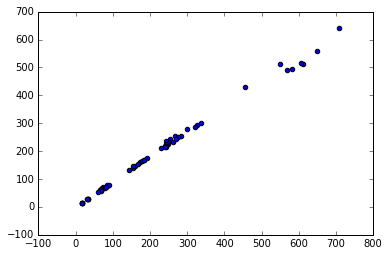

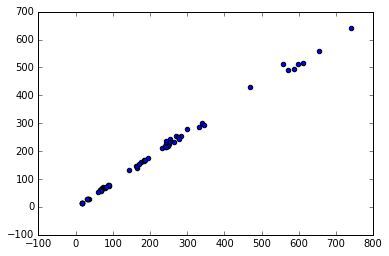

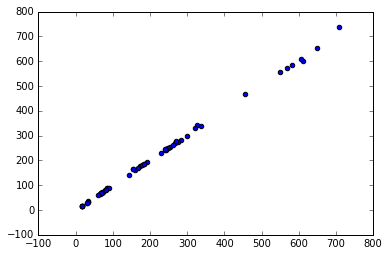

In [292]:
plt.scatter(ig, best_known)
plt.show()
plt.scatter(dls, best_known)
plt.show()
plt.scatter(ig, dls)
plt.show()

In [293]:
test_improvement(ig, dls)

Fraction of instances improved :  0.016129032258064516
-0.0152920228603
0.0220533461621
0.0183639398998
-0.111111111111
WilcoxonResult(statistic=37.0, pvalue=1.9203191048950823e-07)
Ttest_relResult(statistic=-4.1581016001533024, pvalue=0.00010193659647135383)
